# Assignment 4

**Computer info:** MacBook Air, Chip: Apple M1, Ram: 8GB, macOs 13.4.1, 2020

<div class="alert alert-warning">
<strong>Instructions for Cell Execution:</strong>

1. Execute the cell under "Used Libraries as first".
2. Run the cells in the order they appear.
3. There is an Extra part (that you can safely skip), where I've made some experiments.
</div>

---
### Used Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random, expovariate
import math
import random

#change palette
import seaborn as sns
from matplotlib import colors
sns.set(rc={"axes.facecolor":"#FAEBD7" , "figure.facecolor":"#FFEFDB"})

---
---
---
---
## Exercise 1


<div class="alert alert-info">
<strong>Instructions for Exercise Reading:</strong>
    
The following section will be organized as follows: for each point, you will first see the required function, followed by a test, and finally, the required comments.
</div>

Fistly, we start by implementing two functions by using Lecture notes.

In [2]:
# Define the rates per minute for time intervals
rates = {
        (0, 6): 0.2,
        (6, 8): 0.9,
        (8, 12): 0.5,
        (12, 15): 0.6,
        (15, 17): 1.0,
        (17, 19): 0.6,
        (19, 24): 0.5,
    }

# Function to calculate the rate at time t
def lambda_(t):
    for interval, rate in rates.items():
        if interval[0] <= t < interval[1]:
            return rate
    return 0.0

# Simulation parameters
T = 24 * 60  # Total duration in minutes
num_simulations=1000

**Revised method**

1. Set $x(0)=0$
2. Sample $m\sim Poisson(U_\lambda T)$
3. for $i=1,\dots,m$
    
    a. Sample $u\sim U(0,1)$
    
    b. set $x_i=x_{i-1}+(T-x_{i-1})(1-u^{\frac{1}{m-i+1}})$
    
    c. sample $y\sim U(0,U_\lambda)$
    
    d. if $y\leq \lambda(x_i)$, print $x_i$

In [3]:
def poisson_simulation():
    
    events=[]
    
    # Total number of events
    m = np.random.poisson(T)
    x = [0.0]  # Initialize the list of arrival times with x(0) = 0
    
    for i in range(1, m + 1):
        # Sample u from a uniform distribution
        u = np.random.uniform(0, 1)

        # Calculate the next arrival time x_i
        x_i = x[i - 1] + (T - x[i - 1]) * (1 - u ** (1 / (m - i + 1)))
        x.append(x_i)

        # Sample y from a uniform distribution between 0 and lambda(x_i)
        y = np.random.uniform(0, 1)
        
        # If y <= lambda(x_i), then print x_i
        if y <= lambda_(x_i/60):
            #print(f"Arrival at time {x_i:.2f} minutes")
            events.append(x_i/60) 
    
    events=sorted(events)
    events=[x * 60 for x in events]
            
    return events

In [4]:
def poisson_stats(num_sim=num_simulations):
    avg_cars_per_minute_list = []  # List to store the average cars per minute for each simulation
    cumulative_cars_list = []  # List to store cumulative cars arriving per minute for each simulation
    events_list = []  # List to store events data for each simulation

    for _ in range(num_sim):
        events = poisson_simulation()

        # Calculate the average number of cars arriving every minute over 24 hours
        avg_cars_per_minute = np.zeros(24 * 60)
        for event in events:
            minute_index = int(event)
            avg_cars_per_minute[minute_index] += 1

        avg_cars_per_minute_list.append(avg_cars_per_minute)

        # Calculate the cumulative number of cars arriving per minute over 24 hours
        cumulative_cars = np.cumsum(avg_cars_per_minute)
        cumulative_cars_list.append(cumulative_cars)

        # Store the events data for this simulation
        events_list.append(events)

    # Calculate the overall average across all simulations
    overall_avg = np.mean(avg_cars_per_minute_list, axis=0)
    cumulative_cars_list=np.mean(cumulative_cars_list, axis=0)

    return events_list, cumulative_cars_list, overall_avg

In [5]:
events_list_revised,cumulative_cars_list_revised,overall_avg_revised=poisson_stats()

**Thinning method**

1. Set $t(0)=0$
2. Set $i=1$
3. Repeat
    
    a. Sample $t\sim Exp(U_\lambda)$
    
    b. Sei $t_i=t+t_{i-1}$
    
    c. if $t_i>T$, stop
    
    d. sample $u\sim U(0,1)$
    
    e. if $u\leq \lambda(t_i)/U_\lambda$, print $t_i$
    
    f. set i=i+1

In [6]:
def poisson_simulation_thinning():
    events = []
    t_i = 0
    i = 1

    while True:
        # Step 3a: Sample t from an exponential distribution with rate U_lambda
        t = expovariate(1)

        # Step 3b: Compute t_i
        t_i = t + t_i
    

        # Step 3c: If t_i exceeds T, stop
        if t_i > T:
            break

        # Step 3d: Sample u from a uniform distribution
        u = np.random.uniform(0, 1)

        # Calculate lambda at t_i
        lambda_t_i = lambda_(t_i/60)

        # Step 3e: If y <= lambda(x_i), print x_i
        if u <= lambda_t_i :
            events.append(t_i/60)
                
        
        # Step 3f: Increment i
        i += 1
    events=sorted(events)
    events=[x * 60 for x in events]
    
    return events

In [7]:
def poisson_stats_thinning(num_sim=num_simulations):
    avg_cars_per_minute_list = []  # List to store the average cars per minute for each simulation
    cumulative_cars_list = []  # List to store cumulative cars arriving per minute for each simulation
    events_list = []  # List to store events data for each simulation

    for _ in range(num_sim):
        events = poisson_simulation()

        # Calculate the average number of cars arriving every minute over 24 hours
        avg_cars_per_minute = np.zeros(24 * 60)
        for event in events:
            minute_index = int(event)
            avg_cars_per_minute[minute_index] += 1

        avg_cars_per_minute_list.append(avg_cars_per_minute)

        # Calculate the cumulative number of cars arriving per minute over 24 hours
        cumulative_cars = np.cumsum(avg_cars_per_minute)
        cumulative_cars_list.append(cumulative_cars)

        # Store the events data for this simulation
        events_list.append(events)

    # Calculate the overall average across all simulations
    overall_avg = np.mean(avg_cars_per_minute_list, axis=0)
    cumulative_cars_list=np.mean(cumulative_cars_list, axis=0)

    return events_list, cumulative_cars_list, overall_avg

In [8]:
events_thinning,cumulative_cars_list_thinning,overall_avg_thinning=poisson_stats_thinning()

---
---
### Point (i)

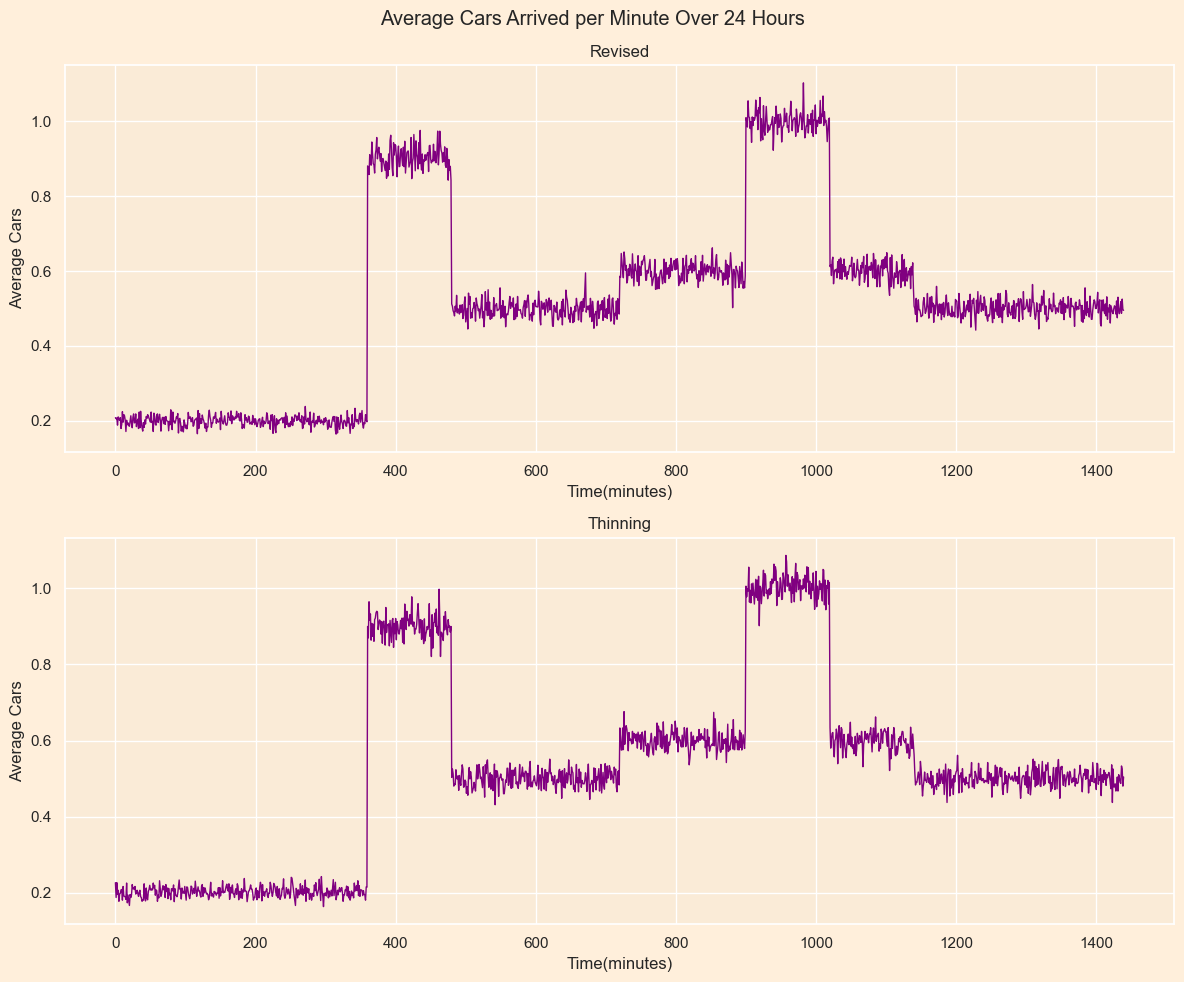

In [9]:
# Adjust figsize for larger plots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))  # Increase width and height

plt.suptitle('Average Cars Arrived per Minute Over 24 Hours')

# First Method
axs[0].plot(overall_avg_revised, color='purple', linewidth=1, markersize=10)
axs[0].set_title('Revised')
axs[0].set_xlabel("Time(minutes)")
axs[0].set_ylabel("Average Cars")

# Second Method
axs[1].plot(overall_avg_thinning, color='purple', linewidth=1, markersize=10)
axs[1].set_title('Thinning')
axs[1].set_xlabel('Time(minutes)')
axs[1].set_ylabel("Average Cars")

plt.tight_layout()
plt.show()

---
---
### Point (ii)

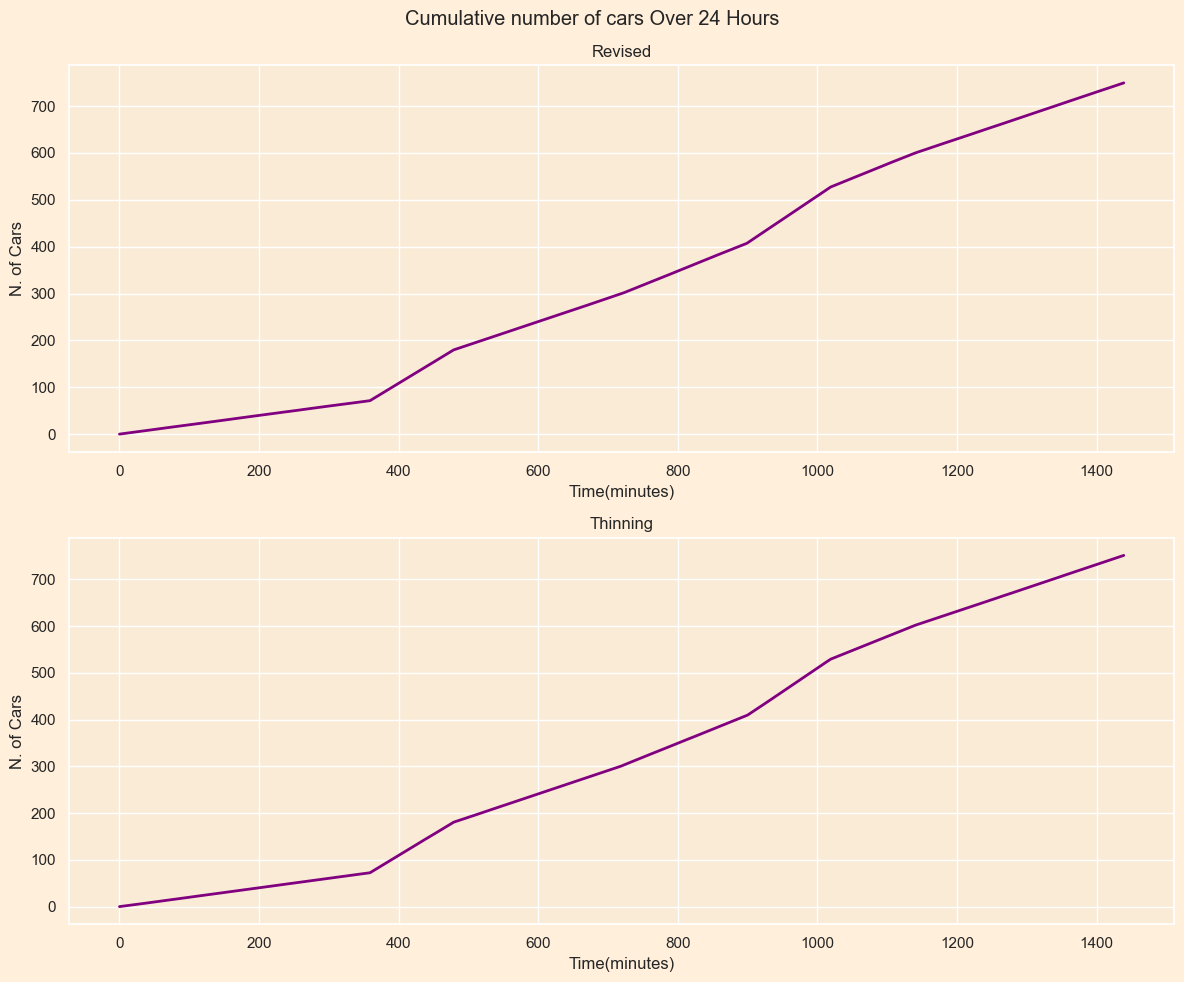

In [10]:
# Adjust figsize for larger plots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))  # Increase width and height

plt.suptitle('Cumulative number of cars Over 24 Hours')

# First Method
axs[0].plot(cumulative_cars_list_revised, color='purple', linewidth=2, markersize=10)
axs[0].set_title('Revised')
axs[0].set_xlabel('Time(minutes)')
axs[0].set_ylabel("N. of Cars")

# Second Method
axs[1].plot(cumulative_cars_list_thinning, color='purple', linewidth=2, markersize=10)
axs[1].set_title('Thinning')
axs[1].set_xlabel('Time(minutes)')
axs[1].set_ylabel("N. of Cars")

plt.tight_layout()
plt.show()

---
---
### Point (iii-iv)

In [11]:
# Compute average number of cars

# Initialize variables to store the average values
avg_revised = 0
avg_thinning = 0

# Loop through the simulations
for i in range(num_simulations):
    # Calculate the average number of cars for the Revised Method
    avg_revised += len(events_list_revised[i]) / num_simulations
    
    # Calculate the average number of cars for the Thinning Method
    avg_thinning += len(events_thinning[i]) / num_simulations

# Compute average time

# Initialize variables to store the average time values
avg_time_revised = 0
avg_time_thinning = 0

# Extract the arrival times for the Revised Method
x = [row[0] for row in events_list_revised]
avg_time_revised = np.mean(x)

# Extract the arrival times for the Thinning Method
x = [row[0] for row in events_thinning]
avg_time_thinning = np.mean(x)

# Print the results
print('Revised Method')
print('Average number of cars:', avg_revised)
print('Average time of first arrival:', avg_time_revised, '\n')
print('Thinning Method')
print('Average number of cars:', avg_thinning)
print('Average time of first arrival:', avg_time_thinning)

Revised Method
Average number of cars: 749.4420000000019
Average time of first arrival: 5.10333864384392 

Thinning Method
Average number of cars: 751.0949999999992
Average time of first arrival: 4.929581048786536
